<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/X_Bar_and_S_Control_Chart_imported_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This code demonstrates how you can plot X-bar and S Control Charts
Note that this code should work for the Phase I of control charting
Other real-time process monitoring software should be used for Phase II of control charting
Example 6-1 from Montgomery Intro to SQC 7ed
Ref. https://towardsdatascience.com/quality-control-charts-guide-for-python-9bb1c859c051

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics


In [5]:
# retrive data for Example 6.1
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/KState_IMSE541/main/ch06example1.csv', sep=',', na_values=".")
#generate the Phase I data using filter
#use the first 30 observations to setup the control charts
dataI= [data[['x1', 'x2', 'x3', 'x4','x5']][data['Exm6-1Samp'] < 26]]
#dataI= [data[['x1', 'x2', 'x3', 'x4','x5']][data[0:31]]

#retrieve the Phase II data
dataII= [data[['x1', 'x2', 'x3', 'x4','x5']][data['Exm6-1Samp'] >= 26]]

#all data points; the data type is a list
dataAll=[data[['x1', 'x2', 'x3', 'x4','x5']]]

dataI

[        x1      x2      x3      x4      x5
 0   1.3235  1.4128  1.6744  1.4573  1.6914
 1   1.4314  1.3592  1.6075  1.4666  1.6109
 2   1.4284  1.4871  1.4932  1.4324  1.5674
 3   1.5028  1.6352  1.3841  1.2831  1.5507
 4   1.5604  1.2735  1.5265  1.4363  1.6441
 5   1.5955  1.5451  1.3574  1.3281  1.4198
 6   1.6274  1.5064  1.8366  1.4177  1.5144
 7   1.4190  1.4303  1.6637  1.6067  1.5519
 8   1.3884  1.7277  1.5355  1.5176  1.3688
 9   1.4039  1.6697  1.5089  1.4627  1.5220
 10  1.4158  1.7667  1.4278  1.5928  1.4181
 11  1.5821  1.3355  1.5777  1.3908  1.7559
 12  1.2856  1.4106  1.4447  1.6398  1.1928
 13  1.4951  1.4036  1.5893  1.6458  1.4969
 14  1.3589  1.2863  1.5996  1.2497  1.5471
 15  1.5747  1.5301  1.5171  1.1839  1.8662
 16  1.3680  1.7269  1.3957  1.5014  1.4449
 17  1.4163  1.3864  1.3057  1.6210  1.5573
 18  1.5796  1.4185  1.6541  1.5116  1.7247
 19  1.7106  1.4412  1.2361  1.3820  1.7601
 20  1.4371  1.5051  1.3485  1.5670  1.4880
 21  1.4738  1.5936  1.6583  1.4

In [6]:
# this np.reshape convert the list dataI into the proper subgroup and m=25
x=np.reshape(dataI, (25,5))
x

array([[1.3235, 1.4128, 1.6744, 1.4573, 1.6914],
       [1.4314, 1.3592, 1.6075, 1.4666, 1.6109],
       [1.4284, 1.4871, 1.4932, 1.4324, 1.5674],
       [1.5028, 1.6352, 1.3841, 1.2831, 1.5507],
       [1.5604, 1.2735, 1.5265, 1.4363, 1.6441],
       [1.5955, 1.5451, 1.3574, 1.3281, 1.4198],
       [1.6274, 1.5064, 1.8366, 1.4177, 1.5144],
       [1.419 , 1.4303, 1.6637, 1.6067, 1.5519],
       [1.3884, 1.7277, 1.5355, 1.5176, 1.3688],
       [1.4039, 1.6697, 1.5089, 1.4627, 1.522 ],
       [1.4158, 1.7667, 1.4278, 1.5928, 1.4181],
       [1.5821, 1.3355, 1.5777, 1.3908, 1.7559],
       [1.2856, 1.4106, 1.4447, 1.6398, 1.1928],
       [1.4951, 1.4036, 1.5893, 1.6458, 1.4969],
       [1.3589, 1.2863, 1.5996, 1.2497, 1.5471],
       [1.5747, 1.5301, 1.5171, 1.1839, 1.8662],
       [1.368 , 1.7269, 1.3957, 1.5014, 1.4449],
       [1.4163, 1.3864, 1.3057, 1.621 , 1.5573],
       [1.5796, 1.4185, 1.6541, 1.5116, 1.7247],
       [1.7106, 1.4412, 1.2361, 1.382 , 1.7601],
       [1.4371, 1.50

In [7]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [8]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in x, ', m)

points in x,  25


[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Group')]

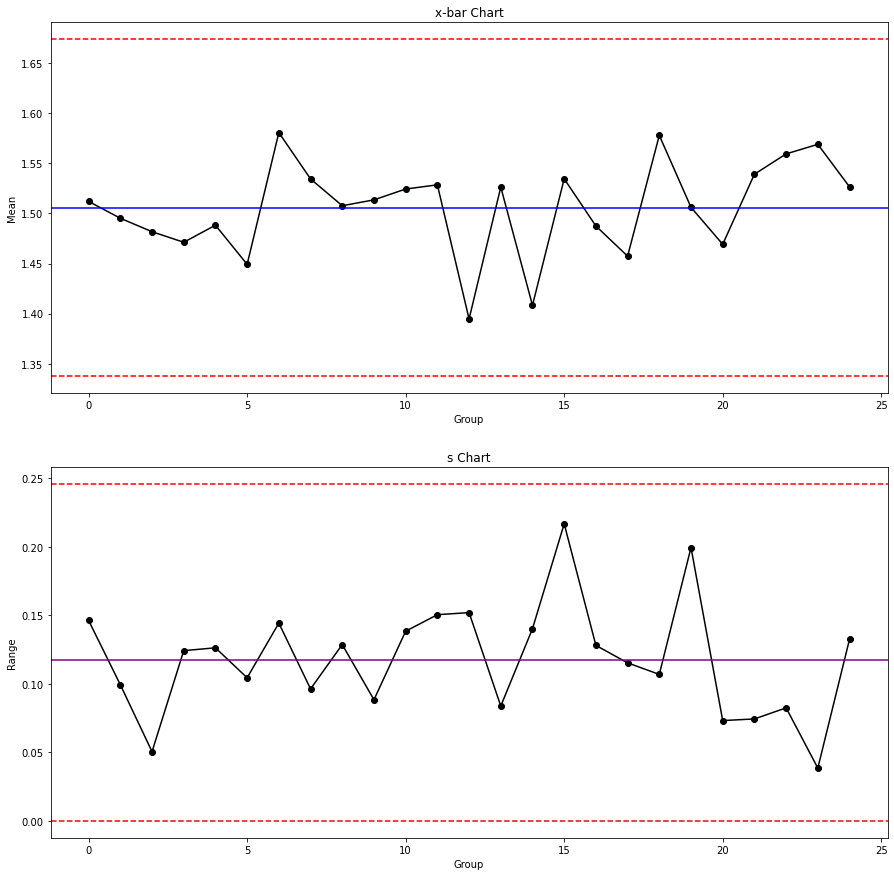

In [9]:
# Plot x-bar and s charts
fig, axs = plt.subplots(2, figsize=(15,15))
# Make sure all chart parameters are changed to reflect the subgroup size n

# Chart parameters A2=0.577, D3, and D4 see the ref for other sample size
A3=1.427 #n=5
B3=0     #n=5
B4=2.089 #n=5

# x-bar chart
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A3*statistics.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A3*statistics.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# s chart
axs[1].plot(s, linestyle='-', marker='o', color='black')
axs[1].axhline((B4*statistics.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((B3*statistics.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(s)), color='purple')
axs[1].set_title('s Chart')
axs[1].set(xlabel='Group', ylabel='Range')

In [11]:
# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A3*statistics.mean(s) or group < statistics.mean(x_bar)-A3*statistics.mean(s):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


In [12]:
# Validate points out of control limits for s chart
i = 0
control = True
for group in s:
    if group > B4*statistics.mean(s) or group < B3*statistics.mean(s):
        print('Group', i, 'out of standard deviation cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


# Your turn: how do you just plot all data? You should use the control limits from Phase I in all cases.

In [15]:
# this np.reshape convert the list dataI into the proper subgroup and m=45
x3=np.reshape(dataAll, (45,5))
# Define list variable for groups means
x_bar3 = []

# Define list variable for groups ranges
s3 = [] 

# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x3:
    x_bar3.append(group.mean())
    s3.append(np.std(group))

m=len(x_bar3)
print('points in x, ', m)

points in x,  45


[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Group')]

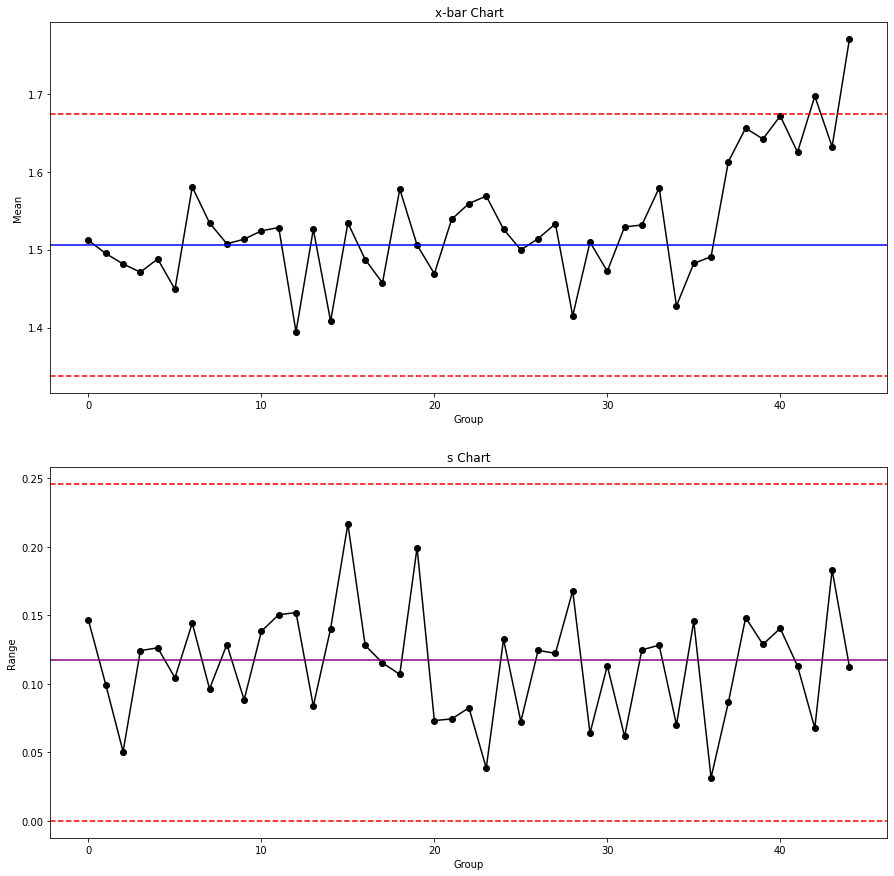

In [17]:
# Plot x-bar and S charts for all data points
# make sure the x-bar-bar and S are from phase I computation
# validate that using the X-bar and S charts previously generated
fig, axs = plt.subplots(2, figsize=(15,15))

# Chart parameters A3, B3, and B4 see the ref for other sample size
A3=1.427 #n=5
B3=0     #n=5
B4=2.089 #n=5

# x-bar chart
axs[0].plot(x_bar3, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A3*statistics.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A3*statistics.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# s chart
axs[1].plot(s3, linestyle='-', marker='o', color='black')
axs[1].axhline((B4*statistics.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((B3*statistics.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(s)), color='purple')
axs[1].set_title('s Chart')
axs[1].set(xlabel='Group', ylabel='Range')

As observed in X-bar chart, the Phase II shows that the process is exibiting a mean shift after observation 35